In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("world_data_full_apply_nulos.csv", index_col=0)

df.head(2)


,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.0,AF,58.1,652.230,323.0,32.49,93.0,Kabul,8.672,149.90,2.3,AFN,4.47,2.1,0.70,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,NaN,48.9,9.3,71.4,11.12,NaN,33.939110,67.709953,Asia
1,Albania,105.0,AL,43.1,28.748,9.0,11.78,355.0,Tirana,4.536,119.05,1.4,ALL,1.62,28.1,1.36,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,NaN,55.7,18.6,36.6,12.33,NaN,41.153332,20.168331,Europe


Eres un analista de datos que trabaja para una organización internacional que se enfoca en el desarrollo y el bienestar de los países. Tu objetivo es realizar un análisis inicial de estadísticas descriptivas sobre varios países utilizando el conjunto de datos proporcionado.
Objetivo: Realizar un análisis de estadísticas descriptivas para comprender mejor la situación de los países en términos de diversos indicadores.


Instrucciones:

Calcula las siguientes estadísticas descriptivas para las variables numéricas:

Media

Mediana

Desviación estándar

Mínimo

Máximo

In [ ]:
df_numericas = df.select_dtypes(include= 'number')
pd.options.display.float_format = '{:.2f}'.format #es para que nos lo ponga en número "normal", con dos dígitos
df_numericas

,density,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,co2-emissions,cpi,cpi_change,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,life_expectancy,maternal_mortality_ratio,minimum_wage,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude
0,60.00,58.10,652.23,323.00,32.49,93.00,8.67,149.90,2.30,4.47,2.10,0.70,19101353833.00,104.00,9.70,47.90,64.50,638.00,0.43,78.40,0.28,NaN,48.90,9.30,71.40,11.12,NaN,33.94,67.71
1,105.00,43.10,28.75,9.00,11.78,355.00,4.54,119.05,1.40,1.62,28.10,1.36,15278077447.00,107.00,55.00,7.80,78.50,15.00,1.12,56.90,1.20,NaN,55.70,18.60,36.60,12.33,NaN,41.15,20.17
2,18.00,17.40,NaN,317.00,24.28,213.00,150.01,151.36,2.00,3.02,0.80,0.28,169988236398.00,109.90,51.40,20.10,76.70,112.00,0.95,28.10,1.72,NaN,41.20,37.20,66.10,11.70,NaN,28.03,1.66
3,164.00,40.00,468.00,NaN,7.20,376.00,469.00,NaN,NaN,1.27,34.00,1.51,3154057987.00,106.40,NaN,2.70,NaN,NaN,6.63,36.40,3.33,77.14,NaN,NaN,NaN,NaN,67.87,42.51,1.52
4,26.00,47.50,NaN,117.00,40.73,244.00,34.69,261.73,17.10,5.52,46.30,0.97,94635415870.00,113.50,9.30,51.60,60.80,241.00,0.71,33.40,0.21,NaN,77.50,9.20,49.10,6.89,NaN,-11.20,17.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,32.00,24.50,912.05,343.00,17.88,58.00,164.18,NaN,254.90,2.27,52.70,0.00,482359318768.00,97.20,79.30,21.40,72.10,125.00,0.01,45.80,1.92,NaN,59.70,NaN,73.30,8.80,NaN,6.42,-66.59
191,314.00,39.30,331.21,522.00,16.75,84.00,192.67,163.52,2.80,2.05,48.10,0.80,261921244843.00,110.60,28.50,16.50,75.30,43.00,0.73,43.50,0.82,NaN,77.40,19.10,37.60,2.01,NaN,14.06,108.28
192,56.00,44.60,527.97,40.00,30.45,967.00,10.61,157.58,8.10,3.79,1.00,0.92,26914402224.00,93.60,10.20,42.90,66.10,164.00,NaN,81.00,0.31,NaN,38.00,NaN,26.60,12.91,NaN,15.55,48.52
193,25.00,32.10,752.62,16.00,36.19,260.00,5.14,212.31,9.20,4.63,65.20,1.40,23064722446.00,98.70,4.10,40.40,63.50,213.00,0.24,27.50,1.19,NaN,74.60,16.20,15.60,11.43,NaN,-13.13,27.85


In [7]:
df_numericas.mean()

density                                         134.50
agricultural_land                                39.12
land_area                                       255.21
armed_forces_size                               103.78
birth_rate                                       20.21
calling_code                                    360.55
co2-emissions                                   125.92
cpi                                             144.19
cpi_change                                        6.72
fertility_rate                                    2.70
forested_area                                    32.02
gasoline_price                                    1.00
gdp                                    477295901399.54
gross_primary_education_enrollment              102.47
gross_tertiary_education_enrollment              37.96
infant_mortality                                 21.33
life_expectancy                                  72.28
maternal_mortality_ratio                        160.39
minimum_wa

In [8]:
df_numericas.median()

density                                         83.00
agricultural_land                               39.60
land_area                                      148.46
armed_forces_size                               28.50
birth_rate                                      17.95
calling_code                                   255.50
co2-emissions                                   34.48
cpi                                            124.74
cpi_change                                       2.30
fertility_rate                                   2.25
forested_area                                   32.00
gasoline_price                                   0.98
gdp                                    34387229486.00
gross_primary_education_enrollment             102.55
gross_tertiary_education_enrollment             31.20
infant_mortality                                14.00
life_expectancy                                 73.20
maternal_mortality_ratio                        53.00
minimum_wage                

In [9]:
df_numericas.std() #desviación estándar

density                                          157.31
agricultural_land                                 21.78
land_area                                        258.39
armed_forces_size                                167.16
birth_rate                                         9.95
calling_code                                     323.24
co2-emissions                                    181.79
cpi                                               54.78
cpi_change                                        24.45
fertility_rate                                     1.28
forested_area                                     23.79
gasoline_price                                     0.37
gdp                                    2172173359474.05
gross_primary_education_enrollment                13.15
gross_tertiary_education_enrollment               29.26
infant_mortality                                  19.55
life_expectancy                                    7.48
maternal_mortality_ratio                        

In [10]:
df_numericas.var()

density                                                    24745.42
agricultural_land                                            474.50
land_area                                                  66762.81
armed_forces_size                                          27941.81
birth_rate                                                    98.92
calling_code                                              104481.78
co2-emissions                                              33049.39
cpi                                                         3001.29
cpi_change                                                   597.82
fertility_rate                                                 1.64
forested_area                                                566.03
gasoline_price                                                 0.14
gdp                                    4718337103608793641517056.00
gross_primary_education_enrollment                           172.96
gross_tertiary_education_enrollment             

In [11]:
df_numericas.min()

density                                       1.26
agricultural_land                             0.60
land_area                                     0.00
armed_forces_size                             0.00
birth_rate                                    5.90
calling_code                                  1.00
co2-emissions                                 1.02
cpi                                          99.03
cpi_change                                   -4.30
fertility_rate                                0.98
forested_area                                 0.00
gasoline_price                                0.00
gdp                                    47271463.00
gross_primary_education_enrollment           23.40
gross_tertiary_education_enrollment           0.80
infant_mortality                              1.40
life_expectancy                              52.80
maternal_mortality_ratio                      2.00
minimum_wage                                  0.01
out_of_pocket_health_expenditur

In [12]:
df_numericas.max()

density                                           847.00
agricultural_land                                  82.60
land_area                                         964.00
armed_forces_size                                 936.00
birth_rate                                         46.08
calling_code                                     1876.00
co2-emissions                                     727.97
cpi                                               550.93
cpi_change                                        254.90
fertility_rate                                      6.91
forested_area                                      98.30
gasoline_price                                      2.00
gdp                                    21427700000000.00
gross_primary_education_enrollment                142.50
gross_tertiary_education_enrollment               136.60
infant_mortality                                   84.50
life_expectancy                                    85.40
maternal_mortality_ratio       

In [ ]:
#Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

df_densidad = df[['country', 'density']].sort_values(by='density', ascending=False).head(1) #	Selecciona solo las columnas 'country' y 'density' del DataFrame df. Así reduces los datos solo a lo que te interesa.
df_densidad

,country,density
133,Palestinian National Authority,847.00


In [16]:
df_poblacion = df[['country', 'population']].sort_values(by= 'population', ascending=True).head(1)
df_poblacion

,country,population
120,Nauru,10.08


In [ ]:
#Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.

df['birth_rate'].mean() 

20.214973544973546

In [ ]:
#Realiza un análisis de la mortalidad infantil (infant_mortality) 
# y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.
df['infant_mortality'].min() #1.4

1.4

In [21]:
df['infant_mortality'].mean()

21.332804232804236

In [ ]:
df['infant_mortality'].max()#84.5

84.5

In [36]:
labels = ['baja', 'moderada', 'alta']
df_mortalidad_cat = pd.cut(df['infant_mortality'], bins=3, labels=labels)
df_mortalidad_cat

0      moderada
1          baja
2          baja
3          baja
4      moderada
         ...   
190        baja
191        baja
192    moderada
193    moderada
194    moderada
Name: infant_mortality, Length: 195, dtype: category
Categories (3, object): ['baja' < 'moderada' < 'alta']

In [38]:
df.columns

Index(['country', 'density', 'abbreviation', 'agricultural_land', 'land_area',
       'armed_forces_size', 'birth_rate', 'calling_code', 'capital/major_city',
       'co2-emissions', 'cpi', 'cpi_change', 'currency-code', 'fertility_rate',
       'forested_area', 'gasoline_price', 'gdp',
       'gross_primary_education_enrollment',
       'gross_tertiary_education_enrollment', 'infant_mortality',
       'largest_city', 'life_expectancy', 'maternal_mortality_ratio',
       'minimum_wage', 'official_language', 'out_of_pocket_health_expenditure',
       'physicians_per_thousand', 'population',
       'population_labor_force_participation', 'tax_revenue', 'total_tax_rate',
       'unemployment_rate', 'urban_population', 'latitude', 'longitude',
       'continent', 'mortalidad_cat'],
      dtype='object')

In [52]:
pd.cut(df["infant_mortality"], bins=3).unique()

[(29.1, 56.8], (1.317, 29.1], (56.8, 84.5], NaN]
Categories (3, interval[float64, right]): [(1.317, 29.1] < (29.1, 56.8] < (56.8, 84.5]]

In [49]:
df["age_cat"] = pd.cut(df['infant_mortality'], bins=3, labels=labels)

In [51]:
df[["infant_mortality", "age_cat"]]

,infant_mortality,age_cat
0,47.90,moderada
1,7.80,baja
2,20.10,baja
3,2.70,baja
4,51.60,moderada
...,...,...
190,21.40,baja
191,16.50,baja
192,42.90,moderada
193,40.40,moderada


<Axes: xlabel='infant_mortality', ylabel='Count'>

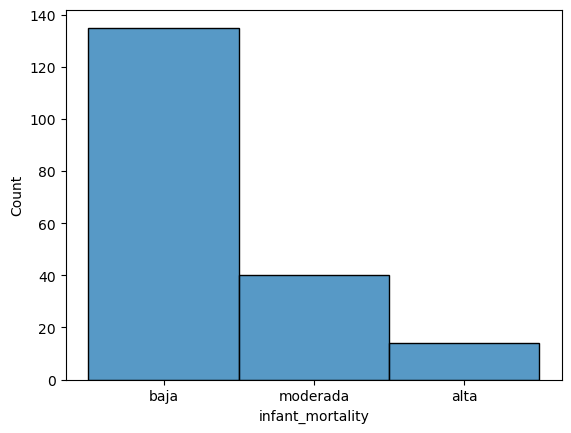

In [ ]:
sns.histplot(data=df_mortalidad_cat) #Si data es una Serie de pandas (una columna), sns.histplot la interpreta como los datos para graficar.

# No necesitas especificar x porque no hay otras columnas: la Serie es el único vector numérico o categórico a graficar.

In [ ]:
#pd.cut

Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación

In [ ]:
correlacion = df['fertility_rate'].corr(df['life_expectancy']) #entre -1 y 1
correlacion #cuando la esperanza de vida disminuye cuando la fertility rate aumenta, tienen un correlacion lineal fuerte -0.85 y negativa

-0.8491528107360005

<Axes: xlabel='life_expectancy', ylabel='fertility_rate'>

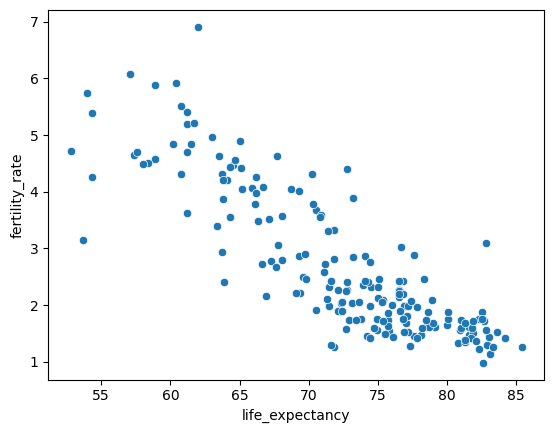

In [ ]:
sns.scatterplot(data=df, y='fertility_rate', x='life_expectancy')
#países con tasas de fertilidad altas suelen tener una esperanza de vida más baja, y viceversa.

<Axes: xlabel='cpi', ylabel='Count'>

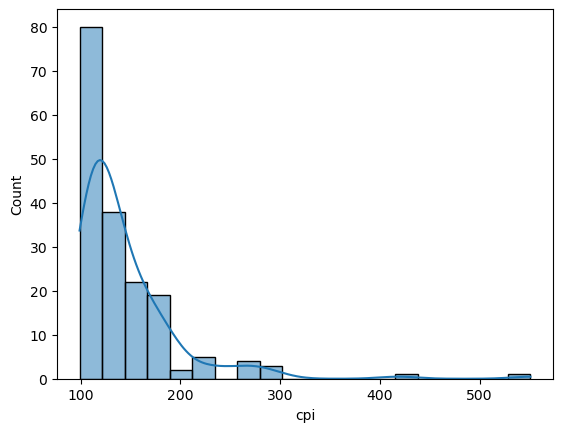

In [ ]:
#Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución de los índices de percepción de corrupción.

sns.histplot(data=df['cpi'], bins=20, kde=True) #poco corruptos

#Valores más altos indican menos corrupción (mejor percepción).

#Valores más bajos indican más corrupción (peor percepción).

In [ ]:
#Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono).

df_diferencia = df[['country', 'gdp']].sort_values(by='gdp', ascending=False).h
df_diferencia

,country,gdp
186,United States,21427700000000.00




Calcula el porcentaje promedio de personas que participan en la fuerza laboral(population_labor_force_participation) para todos los países.

Genera un mapa de calor (heatmap) de la matriz de correlación de todas las variables numéricas y discute las relaciones más destacadas.